In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data=pd.read_csv(r'C:\Users\Ramana Raju\Downloads\MotorTemp\measures_v2.csv')

In [3]:
Data.shape

(1330816, 13)

In [4]:
profile_id_gooddata=[53]

In [5]:
Data_prof=Data[Data['profile_id'].isin(profile_id_gooddata)]

In [6]:
Data_prof.shape

(32442, 13)

<AxesSubplot:>

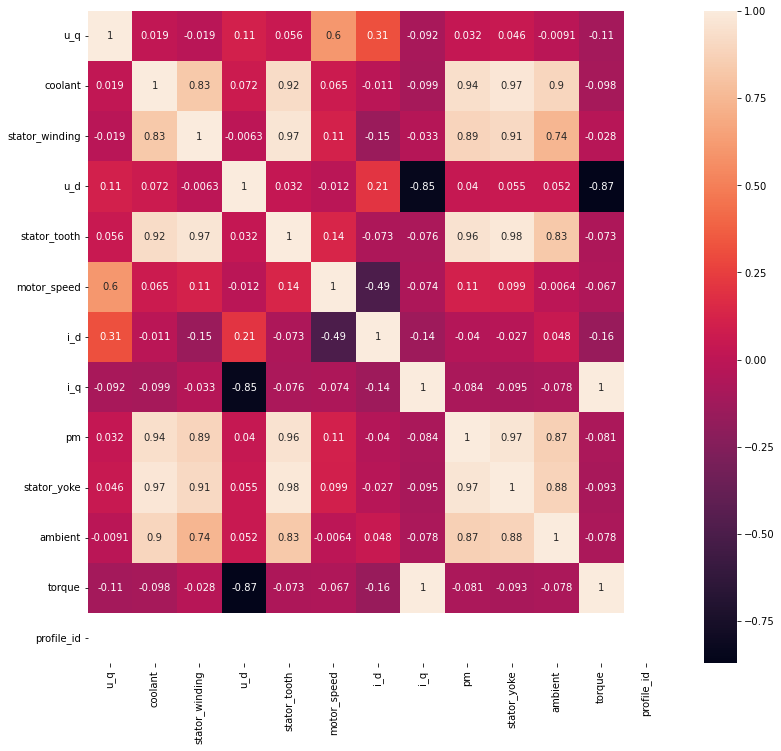

In [7]:
plt.figure(figsize=(13,12))
sns.heatmap(data=Data_prof.corr(),annot=True)

In [8]:
Data_prof.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [9]:
Data_Final=Data_prof.drop(['i_q','stator_tooth','stator_yoke','profile_id','pm'],axis=1)

In [10]:
Data_Final

,u_q,coolant,stator_winding,u_d,motor_speed,i_d,ambient,torque
716054,28.462509,18.596332,24.655130,-19.858287,593.438300,-25.568007,26.376003,68.499350
716055,37.339139,18.621200,24.536465,-26.499809,799.966952,-25.568217,26.375945,68.514387
716056,46.747604,18.642856,24.563136,-33.520416,1018.832488,-25.569664,26.377293,68.525161
716057,56.520823,18.663021,24.629746,-41.235389,1246.558826,-25.810379,26.379338,69.063919
716058,66.475812,18.678275,24.651225,-49.739245,1480.613791,-26.408739,26.379105,70.456038
...,...,...,...,...,...,...,...,...
748491,40.316575,70.230477,114.536781,41.638696,1133.824315,-33.861753,28.271513,-86.982773
748492,39.497422,70.250540,114.548550,38.044784,1092.304757,-30.769271,28.301297,-80.971624
748493,39.147255,70.263658,114.553250,34.548361,1057.652000,-26.777445,28.346392,-74.418064
748494,39.228979,70.273057,114.514950,30.535622,1031.658630,-22.547125,28.378704,-65.838304


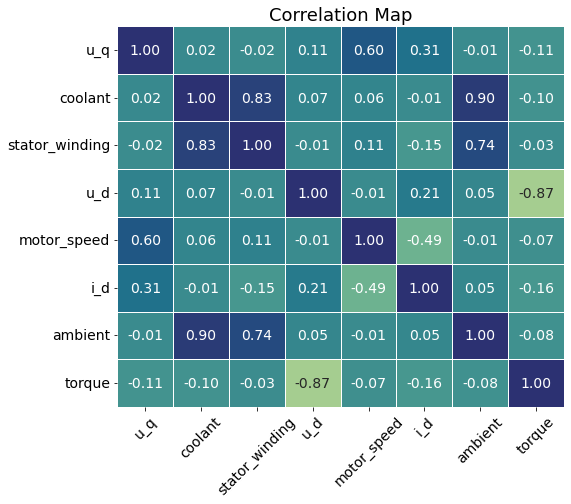

In [39]:
plt.figure(figsize=(8,7))
ax=sns.heatmap(data=Data_Final.corr(),annot=True,linewidth=.6,cbar=False,fmt="0.2f",cmap="crest",annot_kws={"size":14})
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
plt.title('Correlation Map',fontsize=18)
plt.savefig('my_plot.png')

In [40]:
Data_Final=Data_Final.reset_index(drop=True)

In [41]:
x=Data_Final.drop(['stator_winding'],axis=1)

In [42]:
y=Data_Final['stator_winding']

In [43]:
x

,u_q,coolant,u_d,motor_speed,i_d,ambient,torque
0,28.462509,18.596332,-19.858287,593.438300,-25.568007,26.376003,68.499350
1,37.339139,18.621200,-26.499809,799.966952,-25.568217,26.375945,68.514387
2,46.747604,18.642856,-33.520416,1018.832488,-25.569664,26.377293,68.525161
3,56.520823,18.663021,-41.235389,1246.558826,-25.810379,26.379338,69.063919
4,66.475812,18.678275,-49.739245,1480.613791,-26.408739,26.379105,70.456038
...,...,...,...,...,...,...,...
32437,40.316575,70.230477,41.638696,1133.824315,-33.861753,28.271513,-86.982773
32438,39.497422,70.250540,38.044784,1092.304757,-30.769271,28.301297,-80.971624
32439,39.147255,70.263658,34.548361,1057.652000,-26.777445,28.346392,-74.418064
32440,39.228979,70.273057,30.535622,1031.658630,-22.547125,28.378704,-65.838304


for i in x.columns:
    plt.scatter(x[i],y)
    plt.xlabel(i)
    plt.ylabel('stator_winding')
    plt.show()

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
gb_best=GradientBoostingRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=5, n_estimators=400)


In [47]:
gb_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=5,
                          n_estimators=400)

In [48]:
y_pred=gb_best.predict(X_test)
r2_score(y_test,y_pred)

0.9235035260663488

In [49]:
y_pred_train=gb_best.predict(X_train)
r2_score(y_train,y_pred_train)

0.9820338889731277

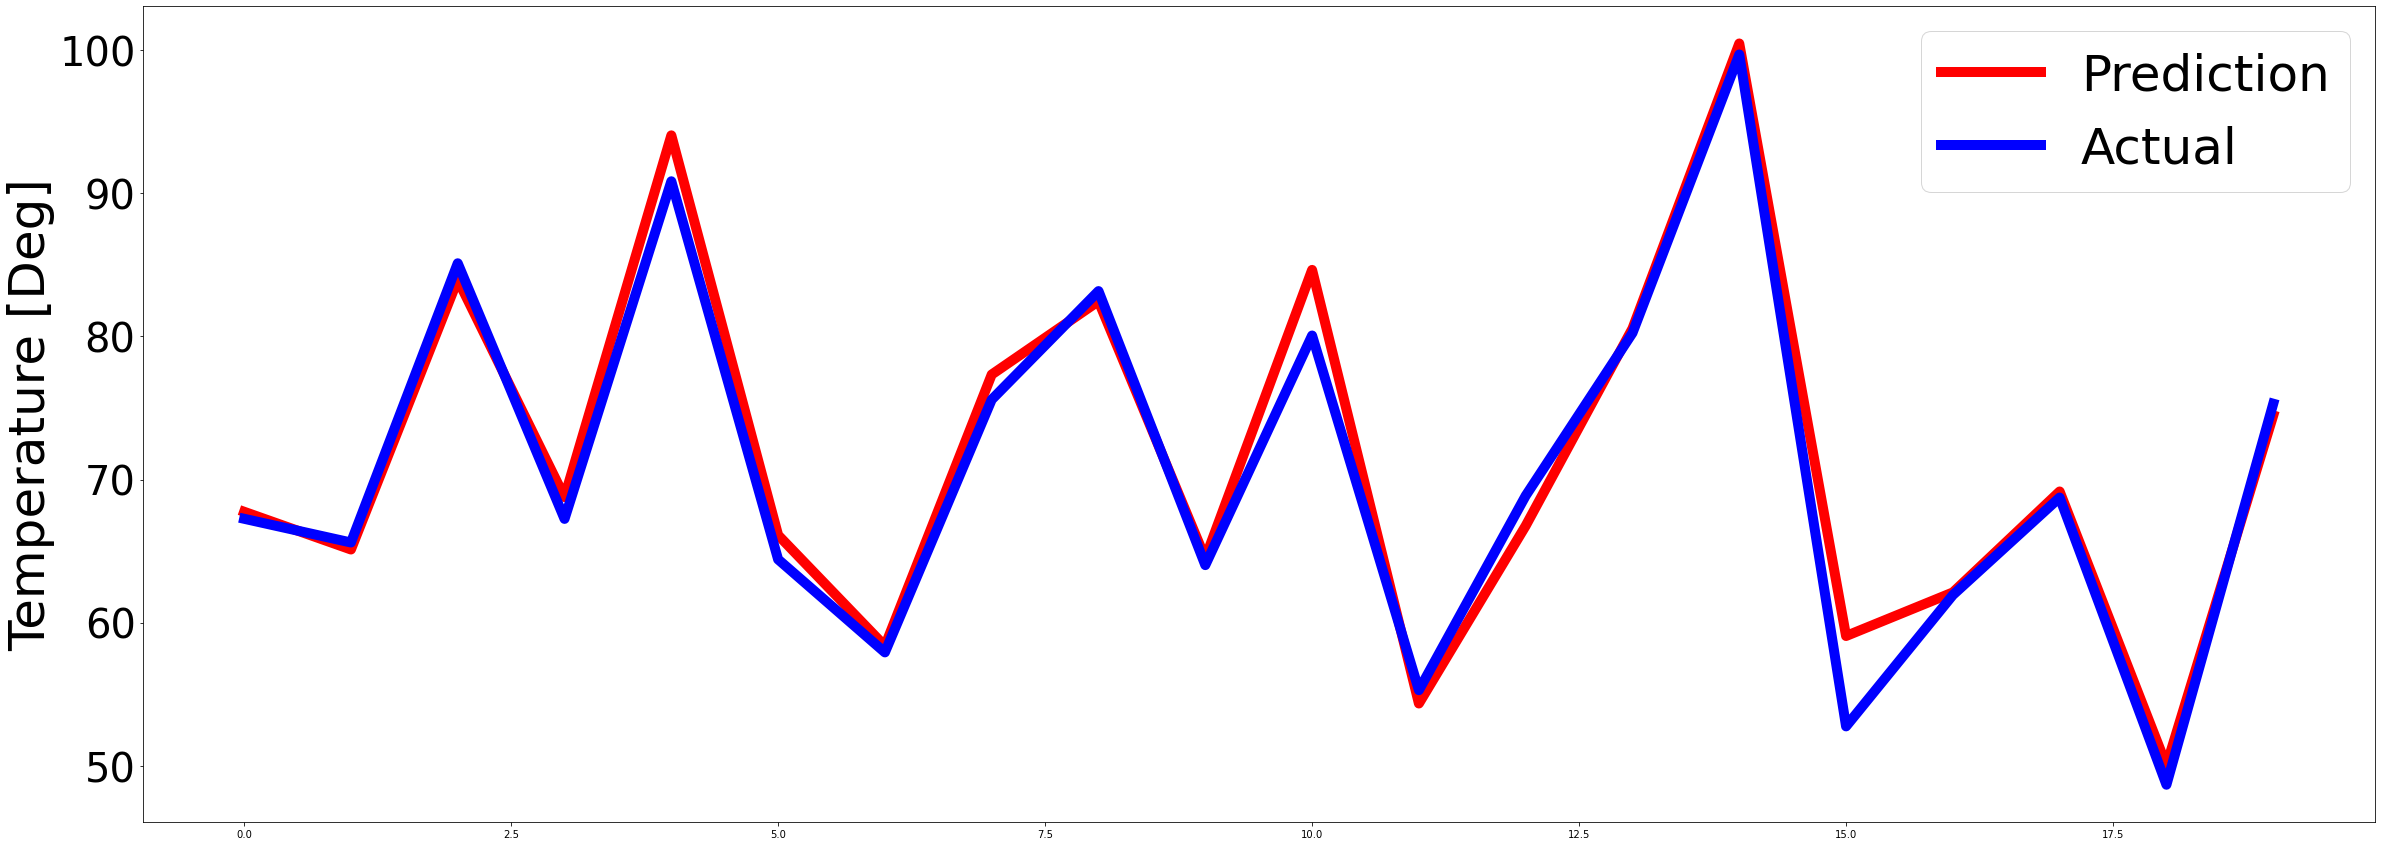

In [92]:
plt.figure(figsize=(40,15))
plt.plot(range(len(y_test[2400:2420])),y_pred[2400:2420],color='red',linewidth=10,label='Prediction')
plt.plot(range(len(y_test[2400:2420])),y_test[2400:2420],color='blue',linewidth=10,label='Actual')
plt.yticks(fontsize=40)
plt.ylabel('Temperature [Deg]',fontsize=50)
plt.legend(fontsize=50)


In [54]:
y_test.size

6489

In [94]:
import pickle
filename = 'GBoost_web.pickle'
pickle.dump(gb_best, open(filename, 'wb'))